In [2]:
import pandas as pd

df = pd.read_csv('customer_satisfaction_data.csv')
df.head(10)

,CustomerID,Age,PlanType,MonthlyBill,HoursWatched_Last30d,SignupDate,CustomerCode,LastSupportTicket
0,28-AHF,77,estandar,38.37,36.1,7/10/2023,28-AHF,ERROR EN LA APLICACION MOVIL. El cliente repor...
1,107-FPV,33,Basico,16.97,23.6,1/6/2025,107-FPV,CONSULTA SOBRE CONTENIDO DISPONIBLE. El proble...
2,11-SNZ,50,Basico,18.28,34.7,1/21/2021,11-SNZ,problema de conexion a internet. El problema p...
3,25-JLV,53,Basico,16.69,38.1,1/21/2022,25-JLV,Queja sobre atencion al cliente. Cliente insat...
4,56-RVU,28,Basico,NaN,22.6,5/21/2024,56-RVU,Queja sobre atencion al cliente
5,117-DDT,38,Estandar,31.42,70.8,11/10/2023,117-DDT,consulta sobre facturacion. El cliente reporta...
6,108-PKP,73,Basico,15.52,47.7,1/27/2022,108-PKP,Consulta tecnica general. El problema persiste...
7,67-ZTN,76,Basico,18.41,30.3,10/9/2024,67-ZTN,Consulta sobre facturacion. El cliente reporta...
8,28-YWV,85,Basico,NaN,45.1,6/12/2025,28-YWV,Error en sistema de recomendaciones. Se requie...
9,42-GWL,25,Basico,17.29,18.0,2/21/2024,42-GWL,OK


In [3]:
print(f'Dimensionalidad del Df: {df.shape}') 
print(f'Info del df: {df.info()}')

Dimensionalidad del Df: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   object 
 1   Age                   1000 non-null   int64  
 2   PlanType              1000 non-null   object 
 3   MonthlyBill           869 non-null    float64
 4   HoursWatched_Last30d  1000 non-null   float64
 5   SignupDate            1000 non-null   object 
 6   CustomerCode          1000 non-null   object 
 7   LastSupportTicket     1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB
Info del df: None


In [4]:
df.isnull().sum()

CustomerID                0
Age                       0
PlanType                  0
MonthlyBill             131
HoursWatched_Last30d      0
SignupDate                0
CustomerCode              0
LastSupportTicket         0
dtype: int64

In [5]:
df.describe()

,Age,MonthlyBill,HoursWatched_Last30d
count,1000.000000,869.000000,1000.000000
mean,53.383000,29.429390,61.305100
std,24.918492,18.508729,43.517534
min,0.000000,10.010000,10.100000
25%,36.000000,15.060000,30.800000
50%,50.500000,25.590000,45.400000
75%,70.000000,35.980000,84.025000
max,145.000000,79.840000,199.500000


In [6]:
df['LastSupportTicket'].value_counts()

LastSupportTicket
OK                                                                                                                                                                             107
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Lorem ipsum dolor sit amet, consectetur adipiscing elit.      47
Problema con subtÃ­tulos                                                                                                                                                        24
Error en la aplicacion movil                                                                                                                                                    24
Consulta tecnica general                                                                                                                                                        21
                                                                                       

In [7]:
df['PlanType'].unique()


array(['estandar', 'Basico', 'Estandar', 'Premium', 'Prem', 'PREM',
       'premium'], dtype=object)

In [8]:
df['PlanType'].value_counts()

PlanType
Basico      488
Estandar    287
Premium      81
premium      52
estandar     46
Prem         26
PREM         20
Name: count, dtype: int64

In [9]:
# Mostrar filas donde la fecha es inválida
df[df['SignupDate'].isna()]


,CustomerID,Age,PlanType,MonthlyBill,HoursWatched_Last30d,SignupDate,CustomerCode,LastSupportTicket


In [10]:
df.describe()

,Age,MonthlyBill,HoursWatched_Last30d
count,1000.000000,869.000000,1000.000000
mean,53.383000,29.429390,61.305100
std,24.918492,18.508729,43.517534
min,0.000000,10.010000,10.100000
25%,36.000000,15.060000,30.800000
50%,50.500000,25.590000,45.400000
75%,70.000000,35.980000,84.025000
max,145.000000,79.840000,199.500000


In [11]:
# Unificando Categoria plantype

df['PlanType'] = df['PlanType'].replace('premium', 'Premium')
df['PlanType'] = df['PlanType'].replace('PREM', 'Premium')
df['PlanType'] = df['PlanType'].replace('Prem', 'Premium')


df['PlanType']= df['PlanType'].replace('estandar', 'Estandar')


In [12]:
df['PlanType'].unique()

array(['Estandar', 'Basico', 'Premium'], dtype=object)

In [13]:
#definimos el orden
orden = ['Basico', 'Estandar', 'Premium']


In [14]:
#Aplicamos la tecnica
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[orden])

df['PlanType_encoded'] = encoder.fit_transform(df[['PlanType']])


In [15]:
df.head(10)

,CustomerID,Age,PlanType,MonthlyBill,HoursWatched_Last30d,SignupDate,CustomerCode,LastSupportTicket,PlanType_encoded
0,28-AHF,77,Estandar,38.37,36.1,7/10/2023,28-AHF,ERROR EN LA APLICACION MOVIL. El cliente repor...,1.0
1,107-FPV,33,Basico,16.97,23.6,1/6/2025,107-FPV,CONSULTA SOBRE CONTENIDO DISPONIBLE. El proble...,0.0
2,11-SNZ,50,Basico,18.28,34.7,1/21/2021,11-SNZ,problema de conexion a internet. El problema p...,0.0
3,25-JLV,53,Basico,16.69,38.1,1/21/2022,25-JLV,Queja sobre atencion al cliente. Cliente insat...,0.0
4,56-RVU,28,Basico,NaN,22.6,5/21/2024,56-RVU,Queja sobre atencion al cliente,0.0
5,117-DDT,38,Estandar,31.42,70.8,11/10/2023,117-DDT,consulta sobre facturacion. El cliente reporta...,1.0
6,108-PKP,73,Basico,15.52,47.7,1/27/2022,108-PKP,Consulta tecnica general. El problema persiste...,0.0
7,67-ZTN,76,Basico,18.41,30.3,10/9/2024,67-ZTN,Consulta sobre facturacion. El cliente reporta...,0.0
8,28-YWV,85,Basico,NaN,45.1,6/12/2025,28-YWV,Error en sistema de recomendaciones. Se requie...,0.0
9,42-GWL,25,Basico,17.29,18.0,2/21/2024,42-GWL,OK,0.0


In [16]:
#manejo de valores atipicos primero observaremos
num_menores_18 = (df['Age'] < 18).sum()
print("Cantidad de registros de clientes menores de 18 años:", num_menores_18)


Cantidad de registros de clientes menores de 18 años: 58


In [17]:
df['Age'].unique()


array([ 77,  33,  50,  53,  28,  38,  73,  76,  85,  25,  40,  46,  89,
        67,  41,  37,  21,  31,  94,  63,  57,  71,  79,  65,  78,  16,
        48,  52,  99,  32,  12,  17,  80,  42,  75,  44,  70,  55,  39,
        47,  24,  72,  61,  68,  92,  60,  90,  58,  96,  36,  35,  49,
        51, 111,   6,  86,  15, 130,  74,  56,  22,  82,  14,  20,  88,
        64,  29,  59,  54,   7,  84,  43,   0,  18,  81,  93,  26,  23,
        62,  45,  69, 134,  34,  27,   4,  95,  97,   8,  91,  30,  19,
        11, 104, 115,  83,   2,   5, 145,  98,  66,   9, 116,  87, 126,
        10, 103, 132, 142, 102,  13, 101, 100, 124, 131, 137, 129, 140,
       117, 113, 109, 128])

In [18]:
# consulta registros mayores a 100 años
num_menores_18 = (df['Age'] > 100).sum()
print("Resgitros de clientes con mas de 100 años:",num_menores_18)


Resgitros de clientes con mas de 100 años: 31


In [19]:
# Filtramos solo las filas con edades entre 18 y 100
df_limpio = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# para reemplazar el DataFrame original con el limpio
df = df_limpio.reset_index(drop=True)

print("Cantidad de registros después de eliminar outliers de edad:", df.shape[0])


Cantidad de registros después de eliminar outliers de edad: 911


In [20]:
#imputacion en facturamensual

df.describe()

,Age,MonthlyBill,HoursWatched_Last30d,PlanType_encoded
count,911.000000,795.000000,911.000000,911.000000
mean,53.822173,29.477497,60.994182,0.689352
std,20.169970,18.499242,43.181109,0.750887
min,18.000000,10.010000,10.100000,0.000000
25%,38.000000,15.105000,30.900000,0.000000
50%,51.000000,25.800000,45.300000,1.000000
75%,69.000000,35.995000,83.950000,1.000000
max,100.000000,79.840000,199.500000,2.000000


In [21]:
# Tomamos la edad máxima real del dataset
edad_max = df["Age"].max()

# obtener la media y la desviación estándar reales
media = df["Age"].mean()
desviacion = df["Age"].std()

# Calcular Z-score de la edad máxima
edad_estandarizada = (edad_max - media) / desviacion

# Mostrar resultados
print("Edad original:", edad_max)
print("Media de Age:", media)
print("Desviación estándar:", desviacion)
print("Edad estandarizada (Z-score):", edad_estandarizada)

Edad original: 100
Media de Age: 53.822173435784855
Desviación estándar: 20.169969846844943
Edad estandarizada (Z-score): 2.289434585914289


A partir del conjunto de datos original se obtuvo una muestra aleatoria de prueba correspondiente al 20 % de la información total, dejando el 80 % restante para el entrenamiento del modelo de agrupamiento. Esta separación permite validar el comportamiento del modelo sobre datos no utilizados durante el entrenamiento.

In [22]:
from sklearn.model_selection import train_test_split

# Separamos datos en entrenamiento y prueba
df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=42
)

print("Datos de entrenamiento:", df_train.shape)
print("Datos de prueba:", df_test.shape)


Datos de entrenamiento: (728, 9)
Datos de prueba: (183, 9)


In [23]:
# Copias ppara trabajar
train = df_train.copy()
test = df_test.copy()

# Convertir SignupDate a datetime
train['SignupDate'] = pd.to_datetime(train['SignupDate'], errors='coerce')
test['SignupDate'] = pd.to_datetime(test['SignupDate'], errors='coerce')

# Fecha de referencia 
reference_date = pd.to_datetime('2025-12-12')

# Crear antigüedad del cliente
train['tenure_days'] = (reference_date - train['SignupDate']).dt.days
test['tenure_days'] = (reference_date - test['SignupDate']).dt.days


In [24]:
# Eliminamos columnas que no nos permitan implemnetar la tecnica 

columns_to_drop = [
    'CustomerID',
    'CustomerCode',
    'LastSupportTicket',
    'SignupDate'
]

train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

# Verificamos
print(train.head())
print(train.info())


     Age PlanType  MonthlyBill  HoursWatched_Last30d  PlanType_encoded  \
25    79   Basico        18.47                  38.8               0.0   
84    86  Premium        54.15                 164.7               2.0   
10    40   Basico        12.28                  46.2               0.0   
342   56   Basico        10.95                  24.5               0.0   
889   42  Premium          NaN                  92.8               2.0   

     tenure_days  
25         637.0  
84         940.0  
10        1782.0  
342       1580.0  
889       1616.0  
<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 25 to 102
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   728 non-null    int64  
 1   PlanType              728 non-null    object 
 2   MonthlyBill           629 non-null    float64
 3   HoursWatched_Last30d  728 non-null    float64
 4   PlanType_encoded      728 non-

Se identificaron valores faltantes en las variables MonthlyBill y tenure_days. Para su tratamiento se aplicó una estrategia de imputación mediante la mediana, garantizando la estabilidad del modelo y evitando la eliminación de registros relevantes.

In [25]:
train.drop(columns=['PlanType'], inplace=True)
test.drop(columns=['PlanType'], inplace=True)


In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

cols_to_impute = ['MonthlyBill', 'tenure_days']

train[cols_to_impute] = imputer.fit_transform(train[cols_to_impute])
test[cols_to_impute] = imputer.transform(test[cols_to_impute])


In [27]:
train.isnull().sum()


Age                     0
MonthlyBill             0
HoursWatched_Last30d    0
PlanType_encoded        0
tenure_days             0
dtype: int64

In [28]:
features = [
    'Age',
    'MonthlyBill',
    'HoursWatched_Last30d',
    'PlanType_encoded',
    'tenure_days'
]

X_train = train[features]
X_test = test[features]


In [29]:
# Escalando variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette = []

k_values = range(2, 11) #Probar desde 2 a 10 grupos (1 no tiene ssentido porque estarian los datos juntos) aqui hablamos de clusters

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    
    labels = kmeans.fit_predict(X_train_scaled)
    
    inertia.append(kmeans.inertia_) # inercia para ver que tan juntos quedaron los clientes dentro de los grupos
    print(inertia)
    # numero alto grupos desordenados
    # numero bajo grupos ordenados 
    silhouette.append(silhouette_score(X_train_scaled, labels))


[2203.8662342609987]
[2203.8662342609987, 1732.3505948348648]
[2203.8662342609987, 1732.3505948348648, 1461.9470257174758]
[2203.8662342609987, 1732.3505948348648, 1461.9470257174758, 1260.270175878924]
[2203.8662342609987, 1732.3505948348648, 1461.9470257174758, 1260.270175878924, 1114.0986468900928]
[2203.8662342609987, 1732.3505948348648, 1461.9470257174758, 1260.270175878924, 1114.0986468900928, 1005.2620554291927]
[2203.8662342609987, 1732.3505948348648, 1461.9470257174758, 1260.270175878924, 1114.0986468900928, 1005.2620554291927, 900.9837270627495]
[2203.8662342609987, 1732.3505948348648, 1461.9470257174758, 1260.270175878924, 1114.0986468900928, 1005.2620554291927, 900.9837270627495, 828.5972581295557]
[2203.8662342609987, 1732.3505948348648, 1461.9470257174758, 1260.270175878924, 1114.0986468900928, 1005.2620554291927, 900.9837270627495, 828.5972581295557, 769.8889878115958]


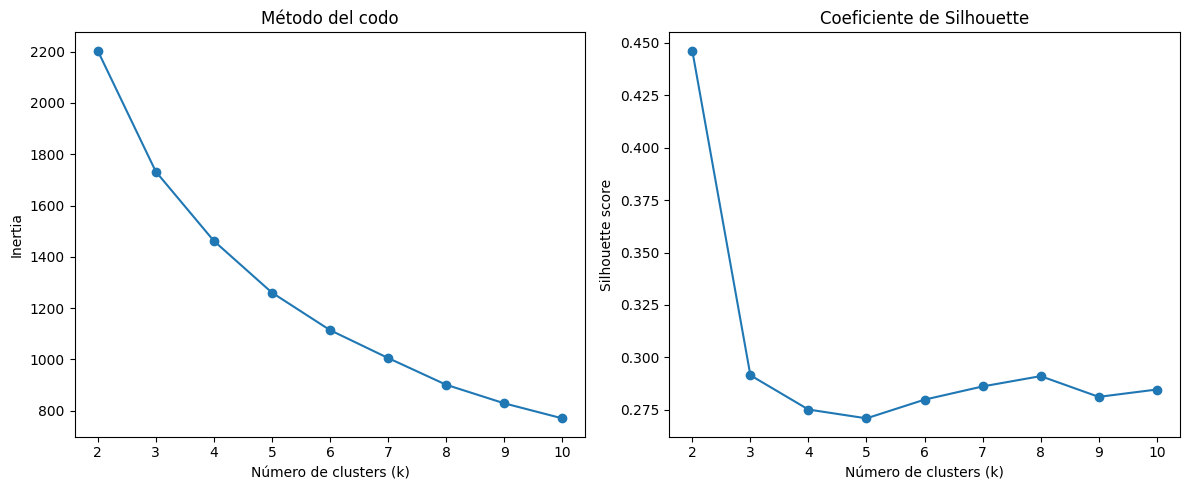

In [31]:
plt.figure(figsize=(12, 5))

# Método del codo
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del codo')

# Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Coeficiente de Silhouette')

plt.tight_layout()
plt.show()


Para la determinación del número óptimo de clusters se aplicaron el método del codo y el coeficiente de Silhouette. El método del codo evidenció una disminución significativa de la inercia hasta k = 4, a partir del cual la mejora es marginal. Por su parte, el coeficiente de Silhouette mostró valores aceptables para k = 4, permitiendo un equilibrio entre compacidad y separación de los grupos. En consecuencia, se seleccionó k = 4 como número óptimo de clusters.


# Entrenamiento del Modelo


In [32]:
from sklearn.cluster import KMeans

k_optimo = 4

kmeans_final = KMeans(
    n_clusters=k_optimo,
    random_state=42,
    n_init=50
)

kmeans_final.fit(X_train_scaled)


,n_clusters,4
,init,'k-means++'
,n_init,50
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


Una vez definido el número óptimo de clusters, se entrenó el modelo K-means utilizando los datos previamente normalizados. Como resultado del entrenamiento, se obtuvieron las coordenadas de los centroides, las cuales representan el centro de cada grupo y permiten caracterizar el comportamiento promedio de los clientes pertenecientes a cada cluster.

In [33]:
centroides = kmeans_final.cluster_centers_

print("Coordenadas de los centroides:")
print(centroides)


Coordenadas de los centroides:
[[-0.56493985  0.1089889   0.14305294  0.48691918 -0.22489203]
 [ 1.1755526  -0.35797767 -0.3372534  -0.33319701  0.22748975]
 [-0.58471792 -0.73231319 -0.70418256 -0.91036221 -0.08694831]
 [ 0.13278796  1.92272483  1.7835791   1.71436527  0.13547779]]


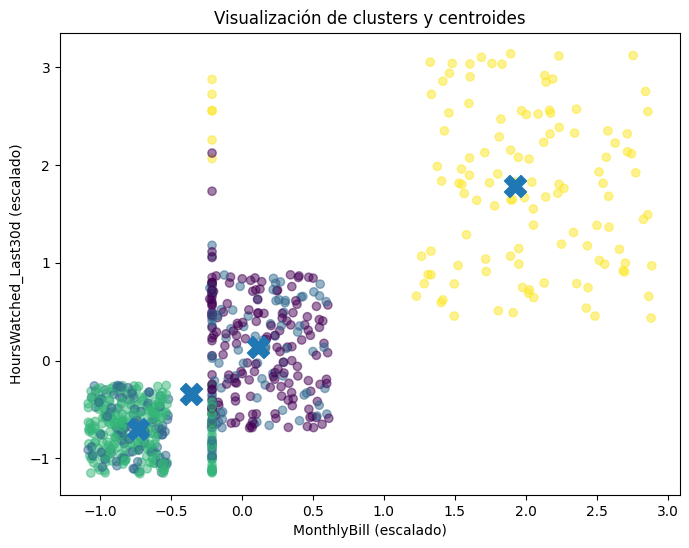

In [34]:
# Centroides graficados

import matplotlib.pyplot as plt
import numpy as np

# Obtener labels del entrenamiento
labels_train = kmeans_final.labels_

# Índices de las variables que vamos a graficar
idx_bill = features.index('MonthlyBill')
idx_hours = features.index('HoursWatched_Last30d')

plt.figure(figsize=(8,6))

# Graficar puntos por cluster
plt.scatter(
    X_train_scaled[:, idx_bill],
    X_train_scaled[:, idx_hours],
    c=labels_train,
    alpha=0.5
)

# Graficar centroides
plt.scatter(
    centroides[:, idx_bill],
    centroides[:, idx_hours],
    marker='X',
    s=250
)

plt.xlabel('MonthlyBill (escalado)')
plt.ylabel('HoursWatched_Last30d (escalado)')
plt.title('Visualización de clusters y centroides')
plt.show()


In [35]:

train_clusters = train.copy()
train_clusters['cluster'] = labels_train

# Promedios por cluster
cluster_profile = train_clusters.groupby('cluster')[features].mean()

print(cluster_profile)


               Age  MonthlyBill  HoursWatched_Last30d  PlanType_encoded  \
cluster                                                                   
0        42.452941    31.008941             67.441176          1.064706   
1        77.680628    22.805183             46.256021          0.439791   
2        42.052632    16.228785             30.071660          0.000000   
3        56.575000    62.873000            139.800833          2.000000   

         tenure_days  
cluster               
0         841.900000  
1        1057.198953  
2         907.550607  
3        1013.408333  


In [36]:
# Predicción de clusters para la muestra de prueba
labels_test = kmeans_final.predict(X_test_scaled)

# Añadir el cluster al dataframe de prueba
test_result = test.copy()
test_result = test_result.reset_index(drop=True)
test_result['cluster'] = labels_test

# Ver las primeras filas
print(test_result.head())


   Age  MonthlyBill  HoursWatched_Last30d  PlanType_encoded  tenure_days  \
0   59        31.21                  41.0               1.0        375.0   
1   77        12.69                  25.0               0.0        963.0   
2   91        34.65                  81.9               1.0        523.0   
3   36        16.27                  40.6               0.0       1248.0   
4   81        39.63                  57.6               1.0       1026.0   

   cluster  
0        0  
1        1  
2        1  
3        2  
4        1  


In [37]:
# Cantidad de clientes por cluster
print(test_result['cluster'].value_counts())


cluster
0    60
2    53
1    46
3    24
Name: count, dtype: int64


In [38]:
# Perfil promedio por cluster (variables originales)
cluster_analysis = test_result.groupby('cluster')[features].mean()

print(cluster_analysis)


               Age  MonthlyBill  HoursWatched_Last30d  PlanType_encoded  \
cluster                                                                   
0        43.666667    30.743000             72.371667          1.016667   
1        78.434783    21.394348             43.773913          0.304348   
2        44.811321    16.144717             28.215094          0.000000   
3        49.958333    63.071667            133.779167          2.000000   

         tenure_days  
cluster               
0         919.566667  
1         982.152174  
2         950.150943  
3         817.791667  
